# Sentiment Analysis Movie Review

For this analysis we’ll be using a dataset of 50,000 movie reviews taken from IMDb. The data was compiled by Andrew Maas and can be found here: IMDb Reviews.
The data is split evenly with 25k reviews intended for training and 25k for testing your classifier. Moreover, each set has 12.5k positive and 12.5k negative reviews.
IMDb lets users rate movies on a scale from 1 to 10. To label these reviews the curator of the data labeled anything with ≤ 4 stars as negative and anything with ≥ 7 stars as positive. Reviews with 5 or 6 stars were left out.

The dataset is available at http://ai.stanford.edu/~amaas/data/sentiment/.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [58]:
# load_files module loads text files with categories as subfolder names.
# The folder names are used as supervised signal label names. 
# The individual file names are not important.
from sklearn.datasets import load_files
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import os
import random
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

You may not always find the dataset available for you to download from Sklearn, Keras type of platforms. Most of the times, you will have to find the dataset yourself and read it to your work space from some file. Below, you will find how you can read the IMDB text files from a folder where files are arranged by the label names.

In [59]:
def load_imdb_sentiment_analysis_dataset(data_path, seed=123):
    """Loads the IMDb movie reviews sentiment analysis dataset.

    # Arguments
        data_path: string, path to the data directory.
        seed: int, seed for randomizer.

    # Returns
        A tuple of training and validation data.
        Number of training samples: 25000
        Number of test samples: 25000
        Number of categories: 2 (0 - negative, 1 - positive)

    # References
        Mass et al., http://www.aclweb.org/anthology/P11-1015

        Download and uncompress archive from:
        http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    """
    imdb_data_path = os.path.join(data_path, 'aclImdb')

    # Load the training data
    train_texts = []
    train_labels = []
    for category in ['pos', 'neg']:
        train_path = os.path.join(imdb_data_path, 'train', category)
        for fname in sorted(os.listdir(train_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(train_path, fname)) as f:
                    z=f.read()
                    train_texts.append(str(z))
                train_labels.append(0 if category == 'neg' else 1)

    # Load the validation data.
    test_texts = []
    test_labels = []
    for category in ['pos', 'neg']:
        test_path = os.path.join(imdb_data_path, 'test', category)
        for fname in sorted(os.listdir(test_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(test_path, fname)) as f:
                    z=f.read()
                    test_texts.append(str(z))
                test_labels.append(0 if category == 'neg' else 1)

    # Shuffle the training data and labels.
    random.seed(seed)
    random.shuffle(train_texts)
    random.seed(seed)
    random.shuffle(train_labels)

    return (train_texts, np.array(train_labels),
            test_texts, np.array(test_labels))

# Load the train dataset

- Load the dataset and divide data into trainval and test datasets. 
- Print the type of the trainval dataset
- Print the length of the trainval dataset
- Print the first document in your trainval dataset


In [60]:
#reviews_train = load_files("aclImdb/train")
#text_train, y_train = reviews_train.data, reviews_train.target
text_trainval, y_trainval, text_test, y_test = load_imdb_sentiment_analysis_dataset("", seed=123)
print("type of text train: {}".format(type(text_trainval)))
print("length of text_train: {}".format(len(text_trainval)))
print("text_train[1]:\n{}".format(text_trainval[1]))

type of text train: <class 'list'>
length of text_train: 25000
text_train[1]:
The long list of "big" names in this flick (including the ubiquitous John Mills) didn't bowl me over to the extent that I couldn't judge the film on its actual merits. It is FULL of stereotypes, caricatures, and standard, set scenes, from the humble air-ace hero to the loud-mouthed yank flyer. The music track was such that at one point, about an hour before the end, I thought the film was over: loud, rising crescendo, grand flourish and finish then silence, but then the movie continued! I found no real storyline, haphazard writing, but smartly-pressed uniforms and the pretty Jean Simmons (pre-nose job) with a rousing little ditty. I cannot say that this picture has any of the ingredients which make a film great. I found it maudlin, mawkish and minor.


- Print the type of your labels 'y'
- Print the lnegth of your labels
- Print the first three labels

In [6]:
print("type of y train: {}\n".format(type(y_trainval)))
print("length of y train: {}\n".format(len(y_trainval)))
print("y_train[0]:{}".format(y_trainval[0]))
print("y_train[1]:{}".format(y_trainval[1]))
print("y_train[2]:{}".format(y_trainval[2]))

type of y train: <class 'numpy.ndarray'>

length of y train: 25000

y_train[0]:0
y_train[1]:0
y_train[2]:1


In [8]:
a=(text_trainval[1])
print(a)
a[0]
a.replace("<br />", " ")

The long list of "big" names in this flick (including the ubiquitous John Mills) didn't bowl me over to the extent that I couldn't judge the film on its actual merits. It is FULL of stereotypes, caricatures, and standard, set scenes, from the humble air-ace hero to the loud-mouthed yank flyer. The music track was such that at one point, about an hour before the end, I thought the film was over: loud, rising crescendo, grand flourish and finish then silence, but then the movie continued! I found no real storyline, haphazard writing, but smartly-pressed uniforms and the pretty Jean Simmons (pre-nose job) with a rousing little ditty. I cannot say that this picture has any of the ingredients which make a film great. I found it maudlin, mawkish and minor.


'The long list of "big" names in this flick (including the ubiquitous John Mills) didn\'t bowl me over to the extent that I couldn\'t judge the film on its actual merits. It is FULL of stereotypes, caricatures, and standard, set scenes, from the humble air-ace hero to the loud-mouthed yank flyer. The music track was such that at one point, about an hour before the end, I thought the film was over: loud, rising crescendo, grand flourish and finish then silence, but then the movie continued! I found no real storyline, haphazard writing, but smartly-pressed uniforms and the pretty Jean Simmons (pre-nose job) with a rousing little ditty. I cannot say that this picture has any of the ingredients which make a film great. I found it maudlin, mawkish and minor.'

- If you go over the reviews in the directory structure, you will notice that many of the reviews contain some html line breaks. 
- Let's clean this. text_trainval is a list containing type bytes(bytes represents a binary encoding of the string data in Python 3.
- after cleaning your dataset, divide your trainval dataset into train and validation datasets 

In [9]:
text_trainval = [doc.replace("<br />", " ") for doc in text_trainval]
print("\nSamples per class (training): {}\n".format(np.bincount(y_trainval)))


Samples per class (training): [12500 12500]



In [11]:
len(np.unique(text_trainval))

24904

In [12]:
np.unique(y_trainval)

array([0, 1])

In [14]:
len(np.unique(y_trainval))

3

In [13]:
print("text_train[1]:\n{}".format(text_trainval[1]))

text_train[1]:
The long list of "big" names in this flick (including the ubiquitous John Mills) didn't bowl me over to the extent that I couldn't judge the film on its actual merits. It is FULL of stereotypes, caricatures, and standard, set scenes, from the humble air-ace hero to the loud-mouthed yank flyer. The music track was such that at one point, about an hour before the end, I thought the film was over: loud, rising crescendo, grand flourish and finish then silence, but then the movie continued! I found no real storyline, haphazard writing, but smartly-pressed uniforms and the pretty Jean Simmons (pre-nose job) with a rousing little ditty. I cannot say that this picture has any of the ingredients which make a film great. I found it maudlin, mawkish and minor.


In [14]:
print("y_train[1]:\n{}".format(y_trainval[1]))

y_train[1]:
0


In [15]:

text_train, text_val, y_train, y_val = train_test_split(text_trainval, y_trainval, stratify=y_trainval, random_state=0)

# Load the test dataset
- This is for the purpose of demonstrating that we can load the same dataset using Sklearn available function

In [19]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target 
print("Number of documents in test data: {}".format(len(text_test))) 
print("Samples per class (test): {}".format(np.bincount(y_test))) 
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

IsADirectoryError: [Errno 21] Is a directory: 'aclImdb/test/neg/.ipynb_checkpoints'

# Bag of Words 
We need to convert the string representation of the corpus into a numeric representation that we can apply our machine learning algorithms to.
We discard most of the structure of the input text, and only count how oftern each word appears in each text in the corpus. This is the mental image of a "bag of words" for a corpus of docs. 
It consists of three steps:
- Tokenization, (CountVectorizer)
- Vocabulary Building, (fitting the CountVectorizer builds the vocabulary)(vocabulary_)
- Encoding (in the form of SciPy sparse matrix)(boW is created via transform) (one vector of word counts for each document in the corpus)(for each word in the document, we have a count of how often it appears in each document)

### CountVectorizer 
- eliminates single letter words like "a"
- tokenizes using a regular expression "\b\w\w+\b". 
- converts all to lowercase letters.




In [21]:
# Fitting of the CountVectorizer consists of tokenization of the training data, 
# and building the vocabulary
# Transforming the CountVectorizer creates the bag-of-words representation
# of the train data.
# the bow is stored in a SciPy sparse matrix that only stores the nonzero
# entries. 
# to look at the actual content of the sparse matrix, convert it to dense 
# array using numpy.toarray() method
vect = CountVectorizer()
# X_train is in the form of bow (after calling transform, bow is created)
X_train = vect.fit_transform(text_train)
print("X_train:\n{}".format(repr(X_train)))
X_val = vect.transform(text_val)

X_train:
<18750x66605 sparse matrix of type '<class 'numpy.int64'>'
	with 2564934 stored elements in Compressed Sparse Row format>


In [24]:
print(vect.inverse_transform(X_val[1141]))#decode())

[array(['2005', 'am', 'america', 'american', 'and', 'animation',
       'animators', 'anime', 'anymore', 'are', 'ass', 'beating', 'became',
       'called', 'came', 'cartoon', 'cartoons', 'characters', 'cheep',
       'classic', 'comes', 'crap', 'current', 'date', 'drawing', 'either',
       'even', 'first', 'found', 'god', 'heard', 'in', 'is', 'japanese',
       'just', 'kappa', 'knew', 'last', 'lazy', 'live', 'messing',
       'mikey', 'never', 'night', 'no', 'not', 'of', 'off', 'oh', 'old',
       'or', 'out', 'popular', 'produce', 'rip', 'show', 'shows', 'sick',
       'since', 'so', 'some', 'style', 'that', 'the', 'they', 'this',
       'to', 'trying', 'uk', 'up', 'usa', 'usually', 'was', 'well',
       'when', 'with', 'wonder', 'year'], dtype='<U66')]


- Print the length of the vocabulary vector

In [25]:
print(len(vect.vocabulary_))
#vect.vocabulary_
#vocabulary_ includes a map of feature terms to indices. 
#get_feature_names array mapping from feature integer indices to feature
#name.

66605


- Get the feature names from the 'vect' object
- Print the type of the feature names
- Print the first 20 feature names
- Print every other 2000th feature name

In [26]:
feature_names = vect.get_feature_names()
print(type(feature_names))
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20])) 
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030])) 
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

<class 'list'>
Number of features: 66605
First 20 features:
['00', '000', '0000000000001', '00001', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410']
Features 20010 to 20030:
['eschews', 'escort', 'escorted', 'escorting', 'escorts', 'escpecially', 'escrow', 'esculator', 'ese', 'eser', 'esha', 'eshaan', 'eshley', 'eskimo', 'eskimos', 'esl', 'esmond', 'esophagus', 'esoteric', 'esoterically']
Every 2000th feature:
['00', 'ahahahahahhahahahahahahahahahhahahahahahahah', 'ashwar', 'beloved', 'bribe', 'celery', 'comforted', 'crossings', 'deter', 'droplet', 'escargot', 'fingertips', 'gaspard', 'gunner', 'homepage', 'inherently', 'kabinett', 'lederhosen', 'majority', 'mikuni', 'nasha', 'organise', 'perversely', 'primrose', 'reboots', 'robson', 'scuppered', 'skimpier', 'starbase', 'synanomess', 'toothpicks', 'unforgiven', 'wager', 'yearbook']


If you notice, the first features are all numbers that appeared somewhere in the reviews. Also, some words appear multiple times both in singular and plural forms. 

# Logistic Regression with cross validation
- Build a Logistic Regression model
- Train the model with cross validation of 5 folds
- Print the mean accuracy score of the corss validation

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5) 
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88


- Get the score on the validation dataset after retaraaiing the model on the train dataset

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000).fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_val, y_val))

0.9994133333333334
0.87424


# Hypertuning C with a GridSearch
- You can tune upir model up by exploring for the best `C` parameter value in your logistic regression model
- Use `GridSearchCV` from Scikitlearn

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
# countvectorizer (text_train)
# pipeline (CountVectorizer, LogisticRegression )
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5) 
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 
print("Best parameters: ", grid.best_params_)


Best cross-validation score: 0.88
Best parameters:  {'C': 0.1}


In [28]:
X_test = vect.transform(text_test) 
print("{:.2f}".format(grid.score(X_test, y_test)))

0.88


# min_df
 - Let's modify the CountVectorizer so that it uses tokens that appear in at least five documents. This will get rid of the silly numbers in the feature set. 
 - Make the grid search again and print the best score

In [27]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <18750x23692 sparse matrix of type '<class 'numpy.int64'>'
	with 2494812 stored elements in Compressed Sparse Row format>


In [28]:
feature_names = vect.get_feature_names()
print("num of features :{}".format(len(feature_names)))
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030])) 
print("Every 700th feature:\n{}".format(feature_names[::700]))

num of features :23692
First 50 features:
['00', '000', '007', '00s', '01', '02', '03', '05', '06', '07', '08', '09', '10', '100', '1000', '101', '102', '103', '105', '108', '10th', '11', '110', '112', '117', '11th', '12', '120', '12th', '13', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '16mm', '16s', '16th', '17', '17th', '18', '180', '1800', '1800s', '1840', '1860']
Features 20010 to 20030:
['stand', 'standard', 'standards', 'standing', 'standout', 'standouts', 'standpoint', 'stands', 'standup', 'stanford', 'stank', 'stanley', 'stanton', 'stanwyck', 'staple', 'stapleton', 'star', 'starbuck', 'stardom', 'stardust']
Every 700th feature:
['00', 'agnes', 'ashton', 'behold', 'bressart', 'cellar', 'colored', 'coups', 'deformed', 'diver', 'elves', 'exuberant', 'forehead', 'god', 'headless', 'il', 'invent', 'kristen', 'lovable', 'melt', 'muslims', 'omar', 'penance', 'preaches', 'railway', 'residents', 'salute', 'shepherd', 'solve', 'stretched', 'tearing', 'trapper', 'unwil

In [29]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.88


Although accuracy did not improve, the number of features are less. The cross validation score did not improve but it speeds up to deal with fewer features.

# Stopwords
Getting rid of uninformative words that are too frequent and language specific. Scikit-learn has a built-in list of English stopwords


In [30]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS))) 
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['whence', 'myself', 'hereupon', 'whenever', 'us', 'them', 'thus', 'name', 'ie', 're', 'full', 'nine', 'sixty', 'when', 'others', 'made', 'have', 'becomes', 'after', 'why', 'describe', 'in', 'thick', 'be', 'therefore', 'though', 'noone', 'see', 'above', 'towards', 'or', 'around']


In [31]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train) 
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<18750x23390 sparse matrix of type '<class 'numpy.int64'>'
	with 1594124 stored elements in Compressed Sparse Row format>


In [32]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5) 
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.88
Best parameters:  {'C': 0.1}


- Fixed sets of stopwords are not very likely to increase the performance. Let's try another approach. 
- Removing stopwords might not always be a good idea especially in sentiment analysis. By removing the stop word, a negative string could turn out to be positive and vice versa. 

# max_df
- max_df also eliminates frequently used words. 

In [37]:
vect = CountVectorizer(min_df=5, max_df=55).fit(text_train) 
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<18750x18903 sparse matrix of type '<class 'numpy.int64'>'
	with 302276 stored elements in Compressed Sparse Row format>


In [38]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5) 
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.76


# Rescaling with tf-idf

Until now, we dropped features that are deemed unimportant. Another approach is to rescale features. The intuition is to give high weight to any term that appears often IN A PARTICULAR DOC, but NOT in many documents in the corpus. 
term-frequency, inverse document frequency. The lower the IDF value of a word, the less unique it is to any particular document.

go over tfidf at web site:
https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/

- Create a pipeline of tfidf vectorizer and a logistic regression estimator
- use the pipe object in your gridsearch with a cross validation with 5-folds 


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                         LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Best cross-validation score: 0.89


In [34]:
grid.best_estimator_

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(min_df=5, norm=None)),
                ('logisticregression', LogisticRegression(C=0.001))])

If you like, you can 3xtract your vectorizer from the pipeline and transform your train or test dataset
- extract tfidfvectorizer from the pipeline
- transform the training dataset
- find max values for each of the features over the dataset
- print the lowest 20 tfidf features
- print the highest 20 tfidf features

In [35]:
#Extract tfidfvectorizer from the pipeline
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
print(type(vectorizer))
#transform the training dataset
X_train = vectorizer.transform(text_train)
#find max values for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel() 
sorted_by_tfidf = max_value.argsort()
    # get feature names
feature_names = np.array(vectorizer.get_feature_names()) 
print("Features with lowest tfidf:\n{}".format(
feature_names[sorted_by_tfidf[:20]])) 
print("Features with highest tfidf: \n{}".format(
feature_names[sorted_by_tfidf[-20:]]))

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
Features with lowest tfidf:
['costs' 'amateurish' 'everywhere' 'prepared' 'poignant' 'uncomfortable'
 'concerns' 'instantly' 'importantly' 'regardless' 'disagree' 'bucks'
 'exaggerated' 'lacked' 'handful' 'occurred' 'areas' 'currently'
 'altogether' 'logical']
Features with highest tfidf: 
['superman' 'gypo' 'keaton' 'europa' 'cal' 'blob' 'paulie' 'roy'
 'hackenstein' 'dillinger' 'vargas' 'jesse' 'basket' 'the' 'victor'
 'victoria' 'zizek' 'rob' 'timon' 'titanic']


Lowest tfidf features are common accross the documents
Highest tfidf features identify specific movies. 

# Work on idf score
- Similarly, we can find the word that have low idf. You can see that they are mosly stopwords.
- And some are domain specific words like watch, movie, etc.
- Notice that some words like good, great, bad are also among most frequent according to tfidf.

In [36]:
sorted_by_idf = np.argsort(vectorizer.idf_) 
print("Features with lowest idf:\n{}".format(
feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'as' 'was' 'on' 'movie' 'not' 'have' 'one' 'be' 'are' 'film' 'you' 'all'
 'at' 'an' 'by' 'like' 'from' 'so' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'can' 'good' 'when' 'more'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'had' 'well' 'me' 'than' 'much' 'their' 'get' 'been' 'were'
 'other' 'do' 'don' 'also' 'most' 'made' 'first' 'her' 'great' 'into'
 'how' 'will' 'because' 'make' 'people' 'way' 'could' 'bad' 'we' 'after'
 'any' 'too' 'then' 'them' 'watch' 'she' 'think' 'acting' 'movies' 'seen'
 'its' 'many']


When you look at the lowest idf words, some words are stop words. Interestingly, great, good are also in the list. 

# Investigating Model Coefficients
To understand what our model learned, we are going to investigate the model coefficients by looking at the most and least important coeefficients. We will extract the last model that we trained.
- If you like, you can install a module `mglearn` to print the plots. use `! pip install mglearn`


In [37]:
#! pip install mglearn

In [38]:
#import mglearn
#mglearn.tools.visualize_coefficients(
#        grid.best_estimator_.named_steps["logisticregression"].coef_,
#        feature_names, n_top_features=25)

I provide a function to plot important features.

In [51]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

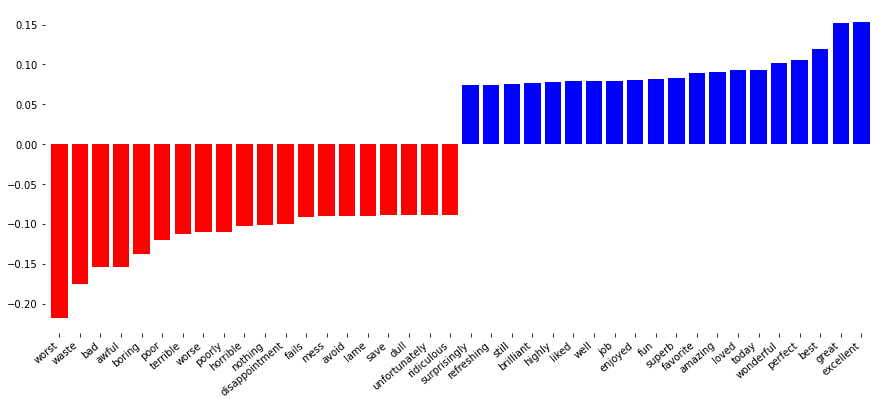

In [40]:

plt.figure(figsize=(15, 6))
plot_important_features(grid.best_estimator_.named_steps\
["logisticregression"].coef_.ravel(), np.array(feature_names), \
top_n=20, rotation=40)
ax = plt.gca()

# Bag-of-words
- disadvantage: word order is completely discarded. 
"It is bad, not good at all" is the same as "It is good, not bad at all."
# n_grams
- pairs of tokens are bigrams
 - unigrams - only one
- `n_gram_range` parameter of `CountVectorizer` and `TfidfVectorizer` is a tuple -> (min, max)
- Adding longer sequences—up to 5-grams—might help too, but this will lead to an explosion of the number of features and might lead to overfitting, as there will be many very specific features.



In [27]:
malory = ["Do you want ants?",
          "Because that’s how you get ants."]

In [28]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(malory)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 8
Vocabulary:
['ants', 'because', 'do', 'get', 'how', 'that', 'want', 'you']


In [29]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(malory)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 8
Vocabulary:
['because that', 'do you', 'get ants', 'how you', 'that how', 'want ants', 'you get', 'you want']


In [30]:
cv = CountVectorizer(ngram_range=(1, 2)).fit(malory)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 16
Vocabulary:
['ants', 'because', 'because that', 'do', 'do you', 'get', 'get ants', 'how', 'how you', 'that', 'that how', 'want', 'want ants', 'you', 'you get', 'you want']


In [31]:
for ngram_range in [(1, 1), (1, 2), (1, 3), (1, 4)]:
    
    cv = CountVectorizer(ngram_range=ngram_range, min_df=4).fit(text_train)
    print("Vocabulary size {} (min_df=4): {}".\
          format(ngram_range, len(cv.vocabulary_)))

Vocabulary size (1, 1) (min_df=4): 26907
Vocabulary size (1, 2) (min_df=4): 153673
Vocabulary size (1, 3) (min_df=4): 248752
Vocabulary size (1, 4) (min_df=4): 280226


In [32]:
cv = CountVectorizer(ngram_range=(1, 4)).fit(text_train)
print("Vocabulary size 1-4gram: {}".format(len(cv.vocabulary_)))

Vocabulary size 1-4gram: 7773845


In [33]:
cv = CountVectorizer(ngram_range=(1, 2), min_df=4).fit(text_train)
print("Vocabulary size (1, 2), min_df=4: {}".format(len(cv.vocabulary_)))
cv = CountVectorizer(ngram_range=(1, 2), min_df=4, \
                     stop_words="english").fit(text_train)
print("Vocabulary size (1, 2), stopwords, min_df=4: {}".\
      format(len(cv.vocabulary_)))

Vocabulary size (1, 2), min_df=4: 153673
Vocabulary size (1, 2), stopwords, min_df=4: 78373


In [34]:
cv4 = CountVectorizer(ngram_range=(4, 4), min_df=4).fit(text_train)
cv4sw = CountVectorizer(ngram_range=(4, 4), min_df=4,\
                        stop_words="english").fit(text_train)
print(len(cv4.get_feature_names()))
print(len(cv4sw.get_feature_names()))

31474
372


In [37]:
print(cv4.get_feature_names()[::1000])

['10 for this movie', 'and even then you', 'anyone familiar with the', 'bad but this is', 'but the ending is', 'devil knows you re', 'faithful to the book', 'for what it really', 'has the feel of', 'if they had been', 'in the movie can', 'is not love song', 'it is far from', 'just one of the', 'material to work with', 'my big fat greek', 'of the actors have', 'on so many levels', 'performance in this film', 'seem like they re', 'take it too seriously', 'the action scenes are', 'the film succeeds in', 'the movie would have', 'the time and place', 'thirds of the way', 'this movie when it', 'to go see this', 'took me by surprise', 'was trying to make', 'which is why the', 'you can tell they']


In [38]:
print(cv4sw.get_feature_names()[::10])

['10 year old boy', 'academy award best picture', 'alison parker cristina raines', 'bad acting bad special', 'best movies ve seen', 'burt reynolds dom deluise', 'church jesus christ day', 'dauphine university paris pantheon', 'doc savage man bronze', 'don say didn warn', 'douglas fairbanks william hart', 'fast times ridgemont high', 'film worst film seen', 'gave great supporting role', 'harris arden patrick wilson', 'jacques coulardeau university paris', 'john rooney paul newman', 'la maman et la', 'like texas chainsaw massacre', 'low budget horror flick', 'makes movie worth watching', 'morning sunday night monday', 'movie great story great', 'movie ve seen years', 'mystery science theater 3000', 'palm springs international film', 'pierce brosnan greg kinnear', 'production design spectacular costumes', 'really looking forward seeing', 'robert stack dorothy malone', 'saw movie years ago', 'sky captain world tomorrow', 'story doesn make sense', 'total waste time money', 've seen long tim

In [39]:
bla = cv4sw.transform(text_train)

In [40]:
print(np.array(cv4sw.get_feature_names())\
      [np.argsort(np.array(bla.sum(axis=0)).\
                  ravel())[::-1][:50]])

['worst movie ve seen' 'worst movies ve seen' '40 year old virgin'
 'mystery science theater 3000' 've seen long time' 'don waste time money'
 'worst film ve seen' 'best movies ve seen' 'worst films ve seen'
 'don waste time watching' 'jean claude van damme'
 'really wanted like movie' 'lose friends alienate people'
 'don think ve seen' 'toronto international film festival'
 'just doesn make sense' 'let face music dance' 've seen ve seen'
 'bad bad bad bad' 'fred astaire ginger rogers' 'vote seven title brazil'
 'trey parker matt stone' 'just didn make sense'
 'santa claus conquers martians' 'rock roll high school'
 'don say didn warn' 'crouching tiger hidden dragon' 'best movie ve seen'
 'mystery science theatre 3000' 'maman et la putain' 'la maman et la'
 'low budget horror films' 'don make mistake did'
 'night evelyn came grave' 'according dvd sleeve synopsis'
 'peter cushing christopher lee' 'movies ve seen long'
 'won academy award best' 'left cutting room floor'
 'movie complete 

In [41]:
pd.Series("".join(cv4sw.get_feature_names()).\
          split()).value_counts()[:10]

ve       32
seen     30
movie    17
bad      16
good     13
time     12
waste    12
make     11
worst    11
best     10
dtype: int64

In [42]:
pd.Series(str(cv4sw.get_feature_names()).\
          split()).value_counts()[:10]

ve         32
seen       30
seen',     24
'movie     21
movie      17
movie',    16
bad        16
good       13
'don       13
waste      12
dtype: int64

In [43]:
vect3 = CountVectorizer(ngram_range=(1, 3), min_df=4)
X_train3 = vect3.fit_transform(text_train)

In [46]:
from sklearn.linear_model import LogisticRegression
lr3 = LogisticRegression().fit(X_train3, y_train)

In [48]:
lr3.C

1.0

In [49]:
X_val3 = vect3.transform(text_val)
lr3.score(X_val3, y_val)

0.8912

Text(0.5, 1.0, 'Stopwords included (1-3 gram)')

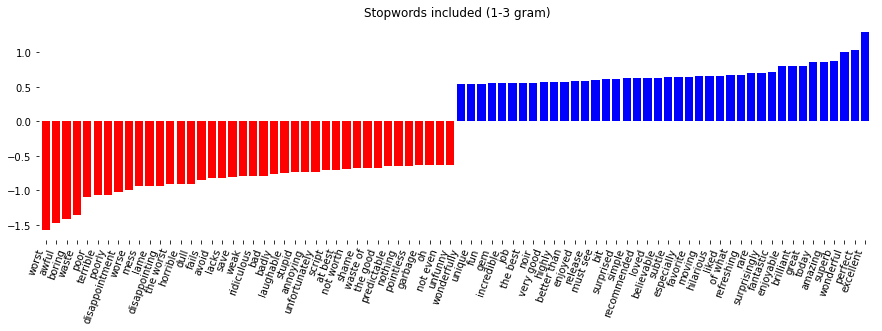

In [52]:
plt.figure(figsize=(15, 4))
plot_important_features(lr3.coef_.ravel(),\
    np.array(vect3.get_feature_names()), top_n=40, rotation=70)
plt.title("Stopwords included (1-3 gram)")
#plt.savefig("images/stopwords_1.png")

Let’s try out the TfidfVectorizer on the IMDb movie review data and find the best
setting of n-gram range using a grid search:
(n_gram_range is a tuple consisting of min and max number of words in a token)
Single words capture a lot of info. Upto 5 is considerable but increasing the max increases the features

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {"logisticregression__C": [ 0.1, 1],
                  "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.89
Best parameters:
{'logisticregression__C': 1, 'tfidfvectorizer__ngram_range': (1, 2)}


Performance increase a bit more by adding bigram and trigram features. 
Let's visualise the cross-validation accuracy as a function of the ngram_range and C parameter as a heatmap.

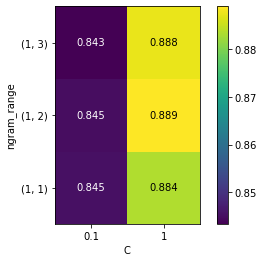

In [57]:
from matplotlib import pyplot as plt
import mglearn
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T # visualize heat map
heatmap = mglearn.tools.heatmap(
        scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
        xticklabels=param_grid['logisticregression__C'],
        yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap);


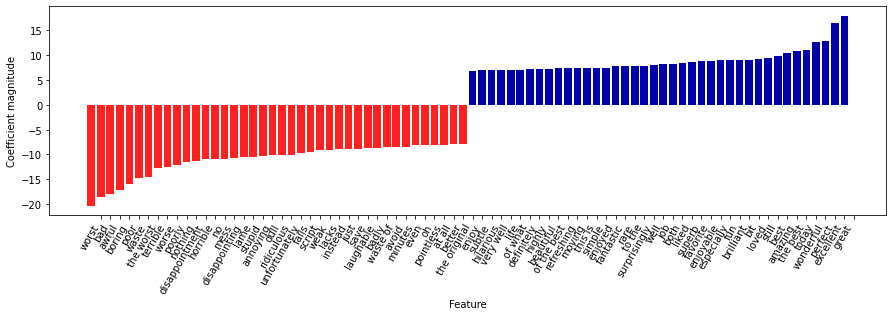

In [77]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps\
['logisticregression'].coef_#\
#mglearn.tools.visualize_coefficients
#(coef, feature_names, n_top_features=40)
plot_important_features(coef.ravel(),\
    feature_names, top_n=40, rotation=70)

Next, let's visualise only trigrams

[False False False ... False False False]


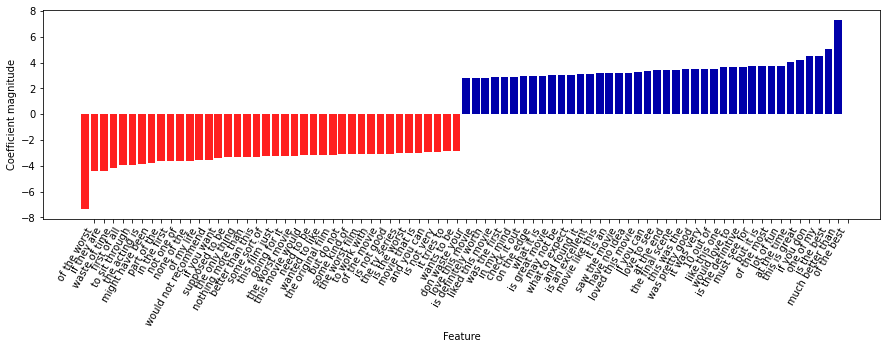

In [78]:
 # find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3 
print(mask)
# visualize only 3-gram features 
mglearn.tools.visualize_coefficients\
(coef.ravel()[mask],feature_names[mask], n_top_features=40)

# Tokenization, Stemming, Lemmatization

- Stemming : dropping common suffixes
- Lemmatization : a known dictionary is applied to get the root of the word (was, were -> be)
Both methods are known as normalization of the text data
- Spelling correction is also another way of normalization
- scikit-learn does NOT implement text normalization

In [79]:
#python -m spacy download en

https://docs.python.org/3/howto/regex.html#regex-howto

In [80]:
import spacy
import nltk
    
# load spacy's English-language models
en_nlp = spacy.load('en')

# instantiate nltk's Porter stemmer 
stemmer = nltk.stem.PorterStemmer()

# define function to compare lemmatization in spacy with stemming in nltk
def compare_normalization(doc):
    # tokenize document in spacy
    doc_spacy = en_nlp(doc)
    # print lemmas found by spacy
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # print tokens found by Porter stemmer
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])


In [81]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                           "I'm scared of meeting the clients tomorrow.")


Lemmatization:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


(?...)
This is an extension notation (a '?' following a '(' is not meaningful otherwise). The first character after the '?' determines what the meaning and further syntax of the construct is. Extensions usually do not create a new group; (?P<name>...) is the only exception to this rule. Following are the currently supported extensions.
(?iLmsux)
(One or more letters from the set 'i', 'L', 'm', 's', 'u', 'x'.) The group matches the empty string; the letters set the corresponding flags: re.I (ignore case), re.L (locale dependent), re.M (multi-line), re.S (dot matches all), re.U (Unicode dependent), and re.X (verbose), for the entire regular expression. (The flags are described in Module Contents.) This is useful if you wish to include the flags as part of the regular expression, instead of passing a flag argument to the re.compile() function.

Note that the (?x) flag changes how the expression is parsed. It should be used first in the expression string, or after one or more whitespace characters. If there are non-whitespace characters before the flag, the results are undefined.

In [82]:
# Technicality: we want to use the regexp-based tokenizer
# that is used by CountVectorizer and only use the lemmatization
# from spacy. To this end, we replace en_nlp.tokenizer (the spacy tokenizer) 
# with the regexp-based tokenization.
import re
import spacy

# regexp used in CountVectorizer
# (?u) means unicode dependent
# esc sequence is repeated twice for the python interpreter to recognize
# \b is for word boundaries
# \w\w+ is for two or more words
regexp = re.compile('(?u)\\b\\w\\w+\\b')

# load spacy language model and save old tokenizer
en_nlp = spacy.load('en')
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp 
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
        regexp.findall(string))

# create a custom tokenizer using the spacy document processing pipeline 
# (now using our own tokenizer)
def custom_tokenizer(document):
    #doc_spacy = en_nlp(document, entity=False, parse=False)
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=\
                             custom_tokenizer, min_df=5)

Let's transform the data and inspect the vocabulary size:

In [83]:
# transform text_train using CountVectorizer with lemmatization
X_train_lemma = lemma_vect.fit_transform(text_train) 
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))
# standard CountVectorizer for reference
vect = CountVectorizer(min_df=5).fit(text_train) 
X_train = vect.transform(text_train) 
print("X_train.shape: {}".format(X_train.shape))

X_train_lemma.shape: (18750, 19047)
X_train.shape: (18750, 23692)


Lemmatization reduced the number of features to 21571. Lemmatization can be seen as a kind of regularization, as it conflates certain features. Therefore, we expect lemmatization to improve performance most when the dataset is small.

During data splitting operations, train_test_split represents random sampling while StratifiedShuffleSplit represents Stratified Sampling. This is a sampling technique that is best used when a statistical population can easily be broken down into distinctive sub-groups. Then samples are taken from each sub-groups based on the ratio of the sub groups size to the total population. On the other hand, Random sampling is ideal when there is not much information about a population or when the data is diverse and not easily grouped.

In [84]:
# build a grid search using only 1% of the data as the training set
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                                train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# perform grid search with standard CountVectorizer
grid.fit(X_train, y_train) 
print("Best cross-validation score "
"(standard CountVectorizer): {:.3f}".format(grid.best_score_)) 
# perform grid search with lemmatization
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
      "(lemmatization): {:.3f}".format(grid.best_score_))


Best cross-validation score (standard CountVectorizer): 0.685
Best cross-validation score (lemmatization): 0.694


In this case, lemmatization provided a modest improvement in performance. 
# Latent Dirichlet Allocation

In [ ]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
        max_iter=25, random_state=0) 
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once 
document_topics = lda.fit_transform(X)

In [ ]:
lda.components_.shape

In [ ]:
# For each topic (a row in the components_), sort the features (ascending) # Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Get the feature names from the vectorizer
feature_names = np.array(vect.get_feature_names())
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10),\
feature_names=feature_names,\
sorting= sorting, topics_per_chunk=5, n_words=10)

Next, we will learn another model, this time with 100 topics. Using more topics makes the analysis much harder, but makes it more likely that topics can specialize to interesting subsets of the data:

In [ ]:
lda100 = LatentDirichletAllocation(n_components=100,\
learning_method="batch",max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

Instead of looking at all the topics, let us look at some of them. 

In [ ]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics,\
feature_names=feature_names,sorting=sorting,\
    topics_per_chunk=7, n_words=20)


Let’s check which kinds of reviews are assigned to this topic:

In [ ]:
# sort by weight of "music" topic 45
music = np.argsort(document_topics100[:, 45])[::-1]
# print the five documents where the topic is most important 
for i in music[:10]:
    # pshow first two sentences
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
for i, words in enumerate(\
feature_names[sorting[:, :2]])] # two column bar chart:
for col in [0, 1]: 
    start=col*50
    end=(col+1)*50
    ax[col].barh(np.arange(50), \
    np.sum(document_topics100, axis=0)[start:end]) 
    ax[col].set_yticks(np.arange(50)) 
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top") 
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

# SpaCy tutorial
https://nlpforhackers.io/complete-guide-to-spacy/

In [ ]:
import spacy
nlp = spacy.load('en')
doc = nlp('Hello     World!')
for token in doc:
    print('"' + token.text + '"', token.idx)

# NLTK vs spaCY

Notice the index preserving tokenization in action. Rather than only keeping the words, spaCy keeps the spaces too. This is helpful for situations when you need to replace words in the original text or add some annotations. With NLTK tokenization, there’s no way to know exactly where a tokenized word is in the original raw text. spaCy preserves this “link” between the word and its place in the raw text.

Nltk was for research purposes. 
Nltk supports various languages, spaCy supports 7 languages with NER.
Nltk is a string processing library. spaCy uses OO.
In sentence tokenization, nltk outperforms spaCy. in word tokenization and POS-tagging spaCy performs better,

spaCy has support for word vectors. nltk does not. 

In [ ]:
nlp = spacy.load('en_core_web_lg')
print(nlp.vocab['banana'].vector)

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(vectorizer.vocabulary_)